# What is RFM? and Why it is used for?

* RFM stands for Recency, Frequency, and Monetary value, which is a popular method used in marketing and customer relationship management (CRM) to analyze and segment customers based on their purchasing behavior.

* The RFM model evaluates customers based on three key metrics:

***Recency:*** How recently a customer has made a purchase

***Frequency:*** How frequently a customer makes purchases

***Monetary Value:*** How much a customer spends on purchases

* RFM analysis assigns each customer a score for each of these metrics, which are then used to segment customers into groups based on their overall score. 
* This segmentation helps businesses identify which customers are most valuable and should receive priority attention, and which customers are less valuable and may require less attention or targeted marketing efforts.

***By usin RFM Analysis;***

**Businesses can develop targeted marketing strategies for each customer segment** 

**Improve customer retention**

**Increase overall revenue by focusing on their most valuable customers.**

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [ ]:
df=pd.read_csv("./marketing_campaign.csv",sep="\t")
df1=df.copy()

In [ ]:
def check(dataframe,head=10):
    print('\033[1m'+10*"*"+' SHAPE '+10*"*"+'\033[0m')
    print(f"Rows:{dataframe.shape[0]}")
    print(f"Columns:{dataframe.shape[1]}")
    print('\033[1m'+10*"*"+' TYPES '+10*"*"+'\033[0m')
    print(dataframe.dtypes)
    print('\033[1m'+10*"*"+' NUNIQUE ELEMENTS '+10*"*"+'\033[0m')
    print(dataframe.nunique())
    print('\033[1m'+10*"*"+' NA '+10*"*"+'\033[0m')
    print(dataframe.isnull().sum())
    print('\033[1m'+10*"*"+' DESCRIBE '+10*"*"+'\033[0m')
    print(dataframe.describe().T)
    print('\033[1m'+10*"*"+' DUPLICATED VALUE '+10*"*"+'\033[0m')
    print(dataframe.duplicated().sum())
    print('\033[1m'+10*"*"+' HEAD '+10*"*"+'\033[0m')
    print(dataframe.head(head))
    
check(df,100)

********** SHAPE **********
Rows:2240
Columns:29
********** TYPES **********
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
**********

# Data Cleaning

#### So, I am going to modify some features as well as create new ones for further rfm analysis.

***Age:*** The age of the customers are the age in 2014 as it's the last record I have (6th Dec 2014) or I can round that up to 2015

***Education:*** Narrowing down to 3 categories

***Living_With:*** Narrowing down to 2 categories

***Total_Children:*** Merging Kidhome and Teenhome columns into 1 column which describes the number of children living in the household

***Dt_Customer:***  changing to Datetime to find the customer's recency 

***Is_Parent:*** Referring to the parenthood status

***Total_Spent:*** Customer's total spent on products

***Renaming several features for simplicity***

In [ ]:
df1["Dt_Customer"]=pd.to_datetime(df1["Dt_Customer"])
d=[]
for i in df1["Dt_Customer"]:
    i=i.date()
    d.append(i)

print(f"Newest customer's enrolment date is {max(d)}")
print(f"Oldest customer's enrolment date is {min(d)}")

Newest customer's enrolment date is 2014-12-06
Oldest customer's enrolment date is 2012-01-08


<ipython-input-27-c0d84749e32e>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
#I want to find the customer's age.
df1['Age']=2023-df1['Year_Birth'] 

#Narrowing down to 3 categories in "Education" variable.
df1['Education']=df1['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate","Master":"Postgraduate","PhD":"Postgraduate"})

#Narrowing down to 2 categories with relationship status
df1['Marital_Status']=df1['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Single':'Alone','Divorced':'Alone','Widow':'Alone','Absurd': 'Alone','YOLO':'Alone'})

#Merging Kidhome and Teenhome columns into 1 column which describes the number of children living in the household
df1['Children']=df1['Kidhome']+df1['Teenhome']

#Referring to the parenthood status
df1['Parental_Status']=df1['Children'].apply(lambda x: 1 if x != 0 else 0)


In [ ]:
# Customer's total spent on products
df1['Total_Spent']=df1['MntWines']+df1['MntFruits']+df1['MntMeatProducts']+df1['MntFishProducts']+df1['MntSweetProducts']+df['MntGoldProds']

#Narrowing down to 1 category with all offers.
df1["Total_Offer"]=df1["AcceptedCmp1"]+df1["AcceptedCmp2"]+df1["AcceptedCmp3"]+df1["AcceptedCmp4"]+df1["AcceptedCmp5"]

#Narrowing down to these columns to 1 total category
df1['Num_Total_Purchases']=df1['NumWebPurchases']+df1['NumCatalogPurchases']+df1['NumStorePurchases']+df1['NumDealsPurchases']

In [ ]:
# I will fill the missing values on "Income" with median value, I can also fill with mean because according to describe() method results
# mean and median values are close to each other.
df1['Income']=df1['Income'].fillna(df1['Income'].median())

# Drop unnecessary columns and nan values
# #cols_to_be_deleted = ["Kidhome", "Teenhome","NumWebVisitsMonth", "AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response",
#                        "Year_Birth", "Complain",'Z_CostContact', 'Z_Revenue']

cols_to_be_deleted=["Kidhome","Teenhome","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts", 
                      "MntGoldProds","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
                      "NumDealsPurchases","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", 
                      "Response","Year_Birth", "Complain",'Z_CostContact', 'Z_Revenue',"Dt_Customer"]

df1=df1.drop(columns=cols_to_be_deleted,axis=1)

In [ ]:
#Now, there are no missing values.
df1.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Recency                0
Age                    0
Children               0
Parental_Status        0
Total_Spent            0
Total_Offer            0
Num_Total_Purchases    0
dtype: int64

In [ ]:
#Now I get the data format that I will use in RFM calculation.
df1.head()

,ID,Education,Marital_Status,Income,Recency,Age,Children,Parental_Status,Total_Spent,Total_Offer,Num_Total_Purchases
0,5524,Graduate,Alone,58138.0,58,66,0,0,1617,0,25
1,2174,Graduate,Alone,46344.0,38,69,2,1,27,0,6
2,4141,Graduate,Partner,71613.0,26,58,0,0,776,0,21
3,6182,Graduate,Partner,26646.0,26,39,1,1,53,0,8
4,5324,Postgraduate,Partner,58293.0,94,42,1,1,422,0,19


In [ ]:
#Visualization of outlier values

fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>Age''<i>Income','<i>Recency'))
#fig.add_trace(go.Box(x=df['Age'],name='Age'),row=1,col=1)
fig.add_trace(go.Box(x=df['Income'],name='Income'),row=1,col=2)
#fig.add_trace(go.Box(x=df['Total_Spent'],name='Total_Spent'),row=2,col=1)
fig.add_trace(go.Box(x=df['Recency'],name='Recency'),row=2,col=2)

fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=600, width=1000, title_text='<b>Box Plots to Check Outliers', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New', showlegend=False)

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.15)
    quartile3 = dataframe[variable].quantile(0.85)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
replace_with_thresholds(df1,"Age")
replace_with_thresholds(df1,"Income")
replace_with_thresholds(df1,"Recency")
#replace_with_thresholds(df1, "Num_Total_Purchases")

# Fun and Extra Visualization🥳🥳

#### Before the RFM calculation I will plot some graps to understand the dataset better.

#### "Age" colum that means for Customer' real age is not required for RFM score at all because in dataset I have "Recency" column but I want to see for myself for fun and learning some graphs😎😎🤩🤩

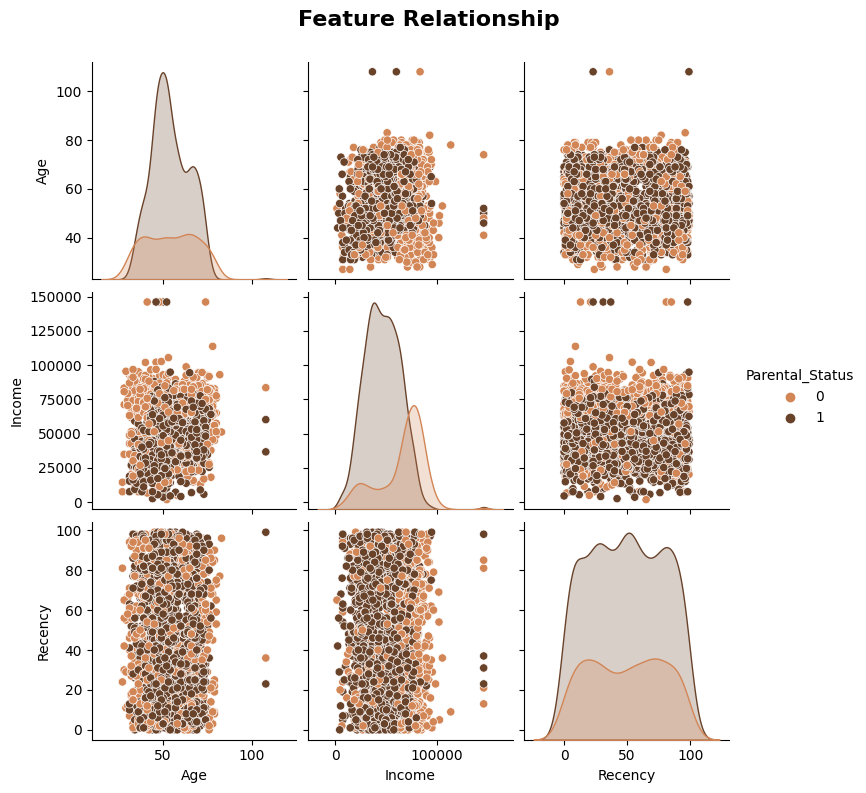

In [ ]:
data=['Age','Income','Recency','Parental_Status']
df1.columns
plot=sns.pairplot(df1[data],hue='Parental_Status',palette='copper_r')
plot.fig.suptitle('Feature Relationship',y=1.05,weight='bold',fontsize=16);

In [ ]:
#For visualization, defining color settings
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D4C8BA","figure.facecolor":"#D4C8BA"})
sns.set_context("poster",font_scale=0.7)

palette=["#101B15","#3A392B","#7A7D58","#FFF7B6","#DD9954","#94583C","#601600"]
# palette_cmap = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
palette_cmap=["#B9C0C9","#D6B2B1","#F3AB60","#9F8A78","#9E726F","#682F2F"]
cluster=["#B9C0C9","#682F2F","#7A7D58","#DD9954"]

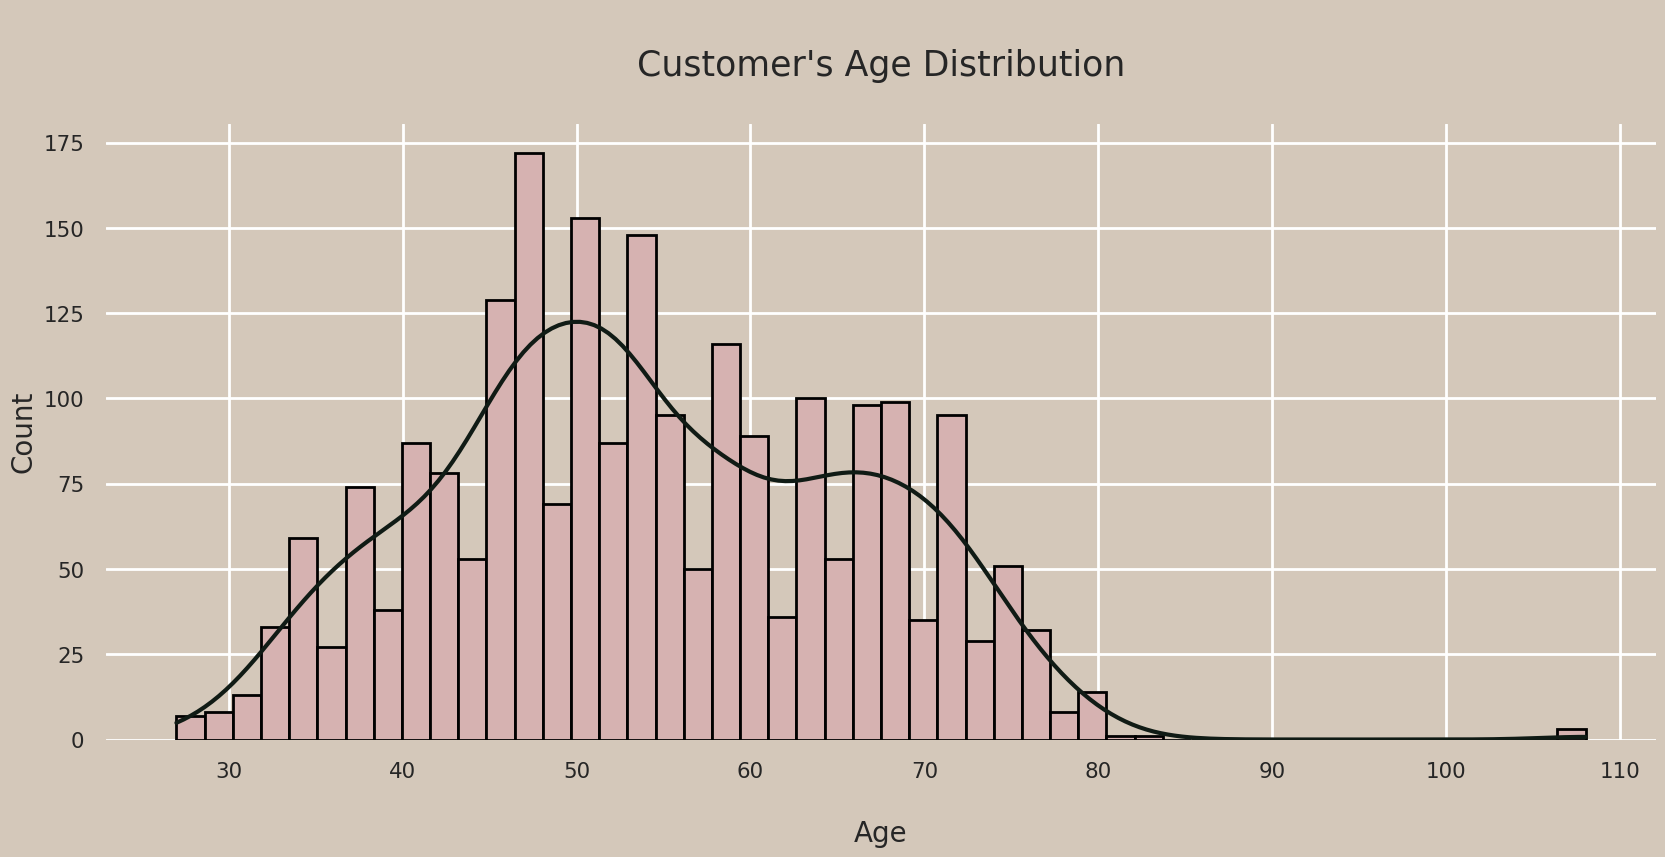

In [ ]:
plt.subplots(figsize=(20, 8))
p=sns.histplot(df1["Age"],color="#D6B2B1",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True,bottom=True)

plt.show()

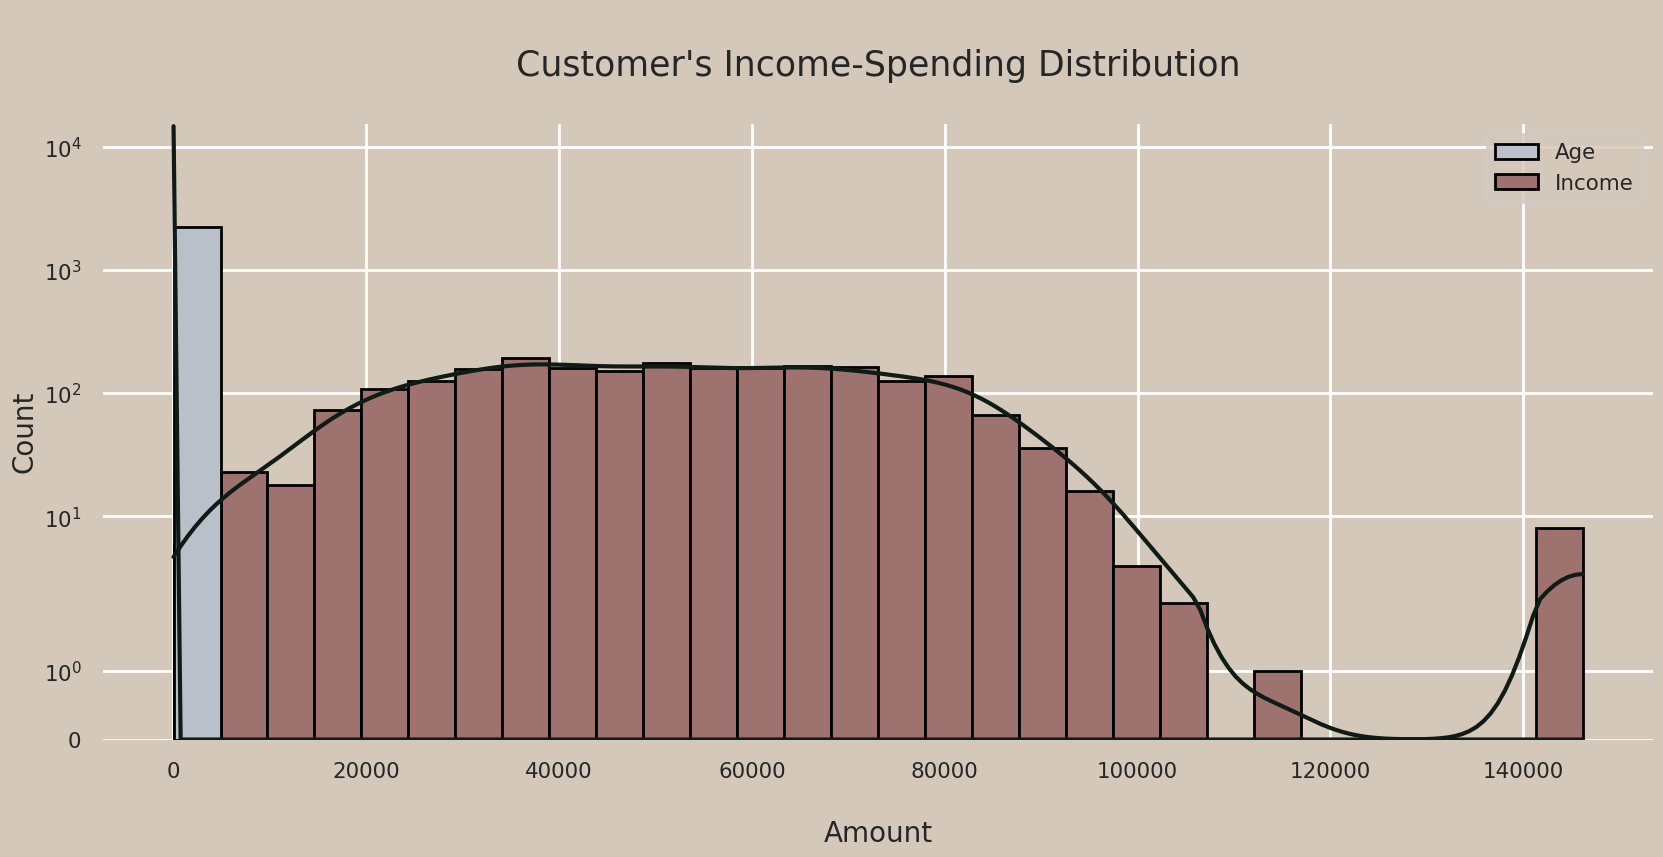

In [ ]:
plt.subplots(figsize=(20,8))
p=sns.histplot(df1[["Age","Income"]],palette=["#B9C0C9", "#9E726F"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True,bottom=True)

plt.show()

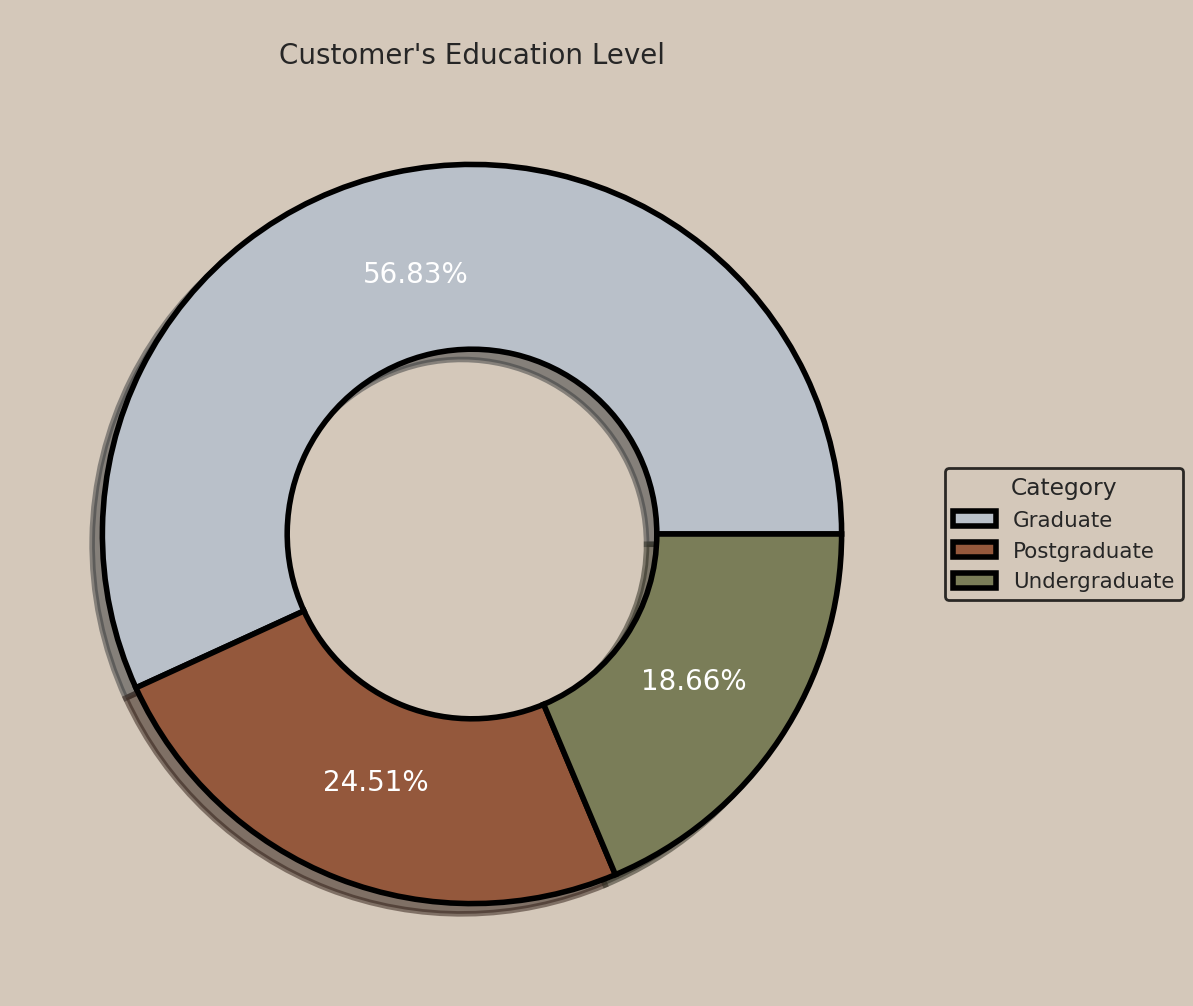

In [ ]:
plt.subplots(figsize=(12,12))
labels="Graduate","Postgraduate","Undergraduate"
size=0.5

wedges, texts, autotexts = plt.pie([df["Education"].value_counts()[0],
                                    df["Education"].value_counts()[1],
                                    df["Education"].value_counts()[2]],
                                    explode=(0,0,0),
                                    textprops=dict(size=20,color="white"),
                                    autopct="%.2f%%", 
                                    pctdistance=0.72,
                                    radius=1, 
                                    colors=["#B9C0C9","#94583C","#7A7D58"], 
                                    shadow=True,
                                    wedgeprops=dict(width=size,edgecolor="black", linewidth=4),
                                    startangle=0)

plt.legend(wedges,labels,title="Category",loc="center left",bbox_to_anchor=(1,0,0.5,1),edgecolor="black")
plt.title("\nCustomer's Education Level",fontsize=20);
plt.show()

# Calculating RFM Metrics

In [ ]:
df1.head()

,ID,Education,Marital_Status,Income,Recency,Age,Children,Parental_Status,Total_Spent,Total_Offer
0,5524,Graduate,Alone,58138.0,58,66,0,0,1617,0
1,2174,Graduate,Alone,46344.0,38,69,2,1,27,0
2,4141,Graduate,Partner,71613.0,26,58,0,0,776,0
3,6182,Graduate,Partner,26646.0,26,39,1,1,53,0
4,5324,Postgraduate,Partner,58293.0,94,42,1,1,422,0


In [ ]:
df1['Frequency']=df1["Total_Spent"]

In [ ]:
rfm=df1.loc[:,['ID','Recency','Frequency','Total_Spent']]

In [ ]:
rfm.head()

,ID,Recency,Frequency,Total_Spent
0,5524,58,1617,1617
1,2174,38,27,27
2,4141,26,776,776
3,6182,26,53,53
4,5324,94,422,422


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           2240 non-null   int64
 1   Recency      2240 non-null   int64
 2   Frequency    2240 non-null   int64
 3   Total_Spent  2240 non-null   int64
dtypes: int64(4)
memory usage: 70.1 KB


In [ ]:
rfm.columns=["ID",'recency','frequency','monetary']
rfm.head().style.background_gradient(cmap="GnBu")

,ID,recency,frequency,monetary
0,5524,58,1617,1617
1,2174,38,27,27
2,4141,26,776,776
3,6182,26,53,53
4,5324,94,422,422


In [ ]:
#It is currently not possible to compare metrics with each other. 
#Therefore I'm going to convert existing RFM metrics into RFM Scores that I can analyze between them.
#I am writing a function for this converting steps.

def rfm_scores(dataframe):
    dataframe["recency_score"]=pd.qcut(dataframe["recency"],5,labels=[5,4,3,2,1])
    dataframe["frequency_score"]=pd.qcut(dataframe["frequency"],5,labels=[1,2,3,4,5])
    dataframe["monetary_score"]=pd.qcut(dataframe["monetary"],5,labels=[1,2,3,4,5])
    dataframe["rfm_score"]=dataframe["recency_score"].astype(str) + dataframe["frequency_score"].astype(str)
    return dataframe

In [ ]:
rfm_scores(rfm)
rfm.head()

,ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,5524,58,1617,1617,3,5,5,35
1,2174,38,27,27,4,1,1,41
2,4141,26,776,776,4,4,4,44
3,6182,26,53,53,4,1,1,41
4,5324,94,422,422,1,3,3,13


# Segments

***Champions:***	Bought recently, buy often and spend the most.	🎉✨🎊

***Loyal Customers:***	Spend good money with us often. Responsive to promotions.🤩🤩

***Potential Loyalist:***	Recent customers, but spent a good amount and bought more than once.🥳🤩

***New Customers:***	Bought most recently, but not often.🧐🧐

***Promising:*** Recent shoppers, but haven’t spent much.😊😊

***Need Attention:***	Above average recency, frequency and monetary values. May not have bought very recently though.🤔🤔

***About To Sleep:***	Below average recency, frequency and monetary values. Will lose them if not reactivated.🥱🥱

***At Risk:***	Spent big money and purchased often. But long time ago. Need to bring them back.😥😥

***Can’t Lose Them:***	Made biggest purchases, and often. But haven’t returned for a long time.😮😮

***Hibernating:***	Last purchase was long back, low spenders and bought seldomly.	😴😴

In [ ]:
#I will make segments based on rfm_score to do this I need a seg_map.
seg_map={
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment']=rfm['rfm_score'].replace(seg_map,regex=True)
rfm.head()

,ID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
0,5524,58,1617,1617,3,5,5,35,loyal_customers
1,2174,38,27,27,4,1,1,41,promising
2,4141,26,776,776,4,4,4,44,loyal_customers
3,6182,26,53,53,4,1,1,41,promising
4,5324,94,422,422,1,3,3,13,at_Risk


In [ ]:
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])

recency          frequency           monetary      
                          mean count         mean count         mean count
segment                                                                   
about_to_sleep       49.345946   185    67.081081   185    67.081081   185
at_Risk              78.896648   358   661.974860   358   661.974860   358
cant_loose           79.278689   183  1603.311475   183  1603.311475   183
champions             8.971591   176  1228.255682   176  1228.255682   176
hibernating          80.163265   343    69.393586   343    69.393586   343
loyal_customers      39.682720   353  1247.903683   353  1247.903683   353
need_attention       50.204819    83   397.650602    83   397.650602    83
new_customers         9.309524    84    31.583333    84    31.583333    84
potential_loyalists  19.034392   378   251.063492   378   251.063492   378
promising            29.855670    97    32.371134    97    32.371134    97

<Figure size 2000x1500 with 0 Axes>

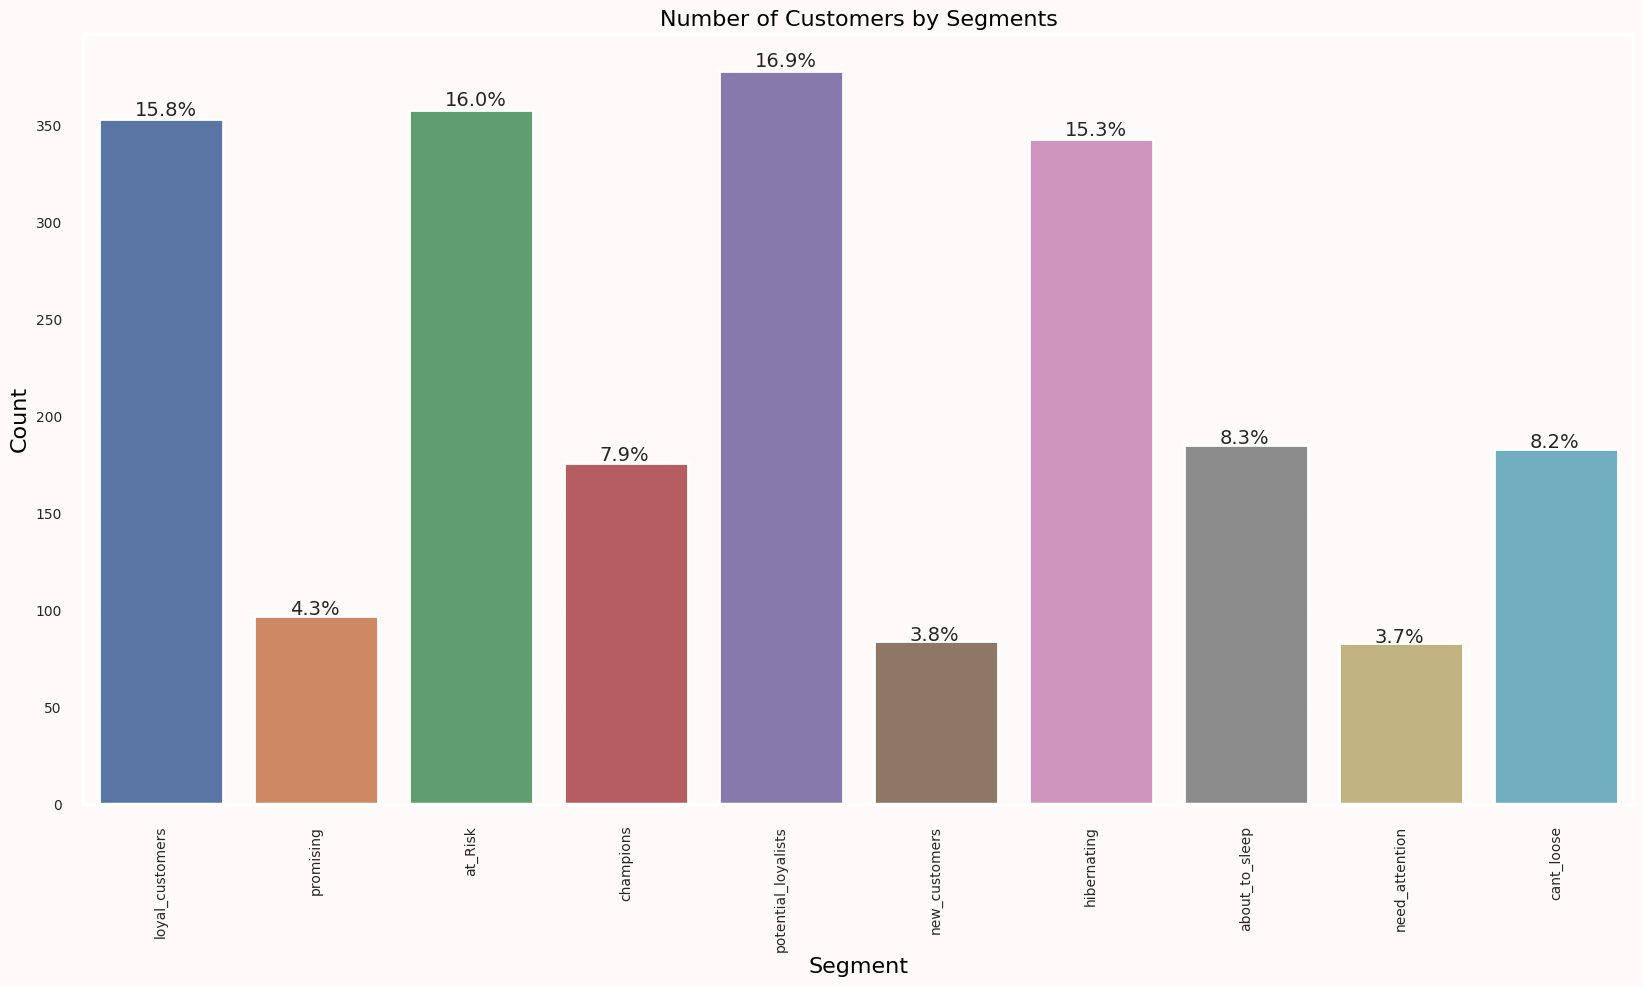

In [ ]:
# RFM segmentlerimizi bir grafik üzerinde çok daha kolay anlamlandırabiliriz.

background="#FFFAFA"
backgroundr="#FFFAFA"
text_color="black"
title_font="Alegreya Sans"

plt.figure(figsize=(20,15))
fig,ax=plt.subplots(figsize=(20,10))
ax.patch.set_facecolor(backgroundr)
fig.set_facecolor(backgroundr)
fig.facecolor="white"
fig.edgecolor="white"

ax.grid(ls="dotted",lw=0.5,color="white",zorder=1);
bar_ap=sns.countplot(data=rfm,x='segment');
total=len(rfm['segment'])
for patch in ax.patches:
    percentage='{:.1f}%'.format(100*patch.get_height()/total)
    x=patch.get_x()+patch.get_width()/2-0.17
    y=patch.get_y()+patch.get_height()*1.005
    ax.annotate(percentage,(x,y),size=14)
    
bar_ap.set_xticklabels(bar_ap.get_xticklabels(),rotation=90);
plt.title('Number of Customers by Segments', size = 16, color=text_color);
plt.ylabel('Count',size=16,color="black")
plt.xlabel("Segment",fontsize=16,color="black")
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()